# 1d acoustic wave on a string test case

This notebook documents the process of developing a 1d string system with motion governed by the acoustic wave equation. We will use a pair of homogeneous Dirichlet boundary conditions as well as initial conditions for the position and velocity. The system is set up as follows:

$$
\frac{\partial^2 u(x,t)}{\partial t^2} = c^2 \frac{\partial^2 u(x,t)}{\partial x^2}, \quad x \in [-L, L], \, t > 0
$$

**Boundary conditions:**

$$
u(-L, t) = 0, \quad u(L, t) = 0
$$

**Initial conditions:**

$$
u(x, 0) = \sin(\frac{2 \pi  x}{L}), \quad u_{t}(x, 0) = 0
$$




In [21]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

### Wave equation analytical solution 

Solving the system above leads to the following solution: 

$$ u(x, t) = \frac{1}{2} \cos(\frac{2 \pi c t}{L}) \sin(\frac{2 \pi x}{L}) $$

Below we plot the initial position of the wave alongside the solution at different time steps, we take $c$ as 1000 m/s leading to a period of 1 second for a length $L$ = 1000m

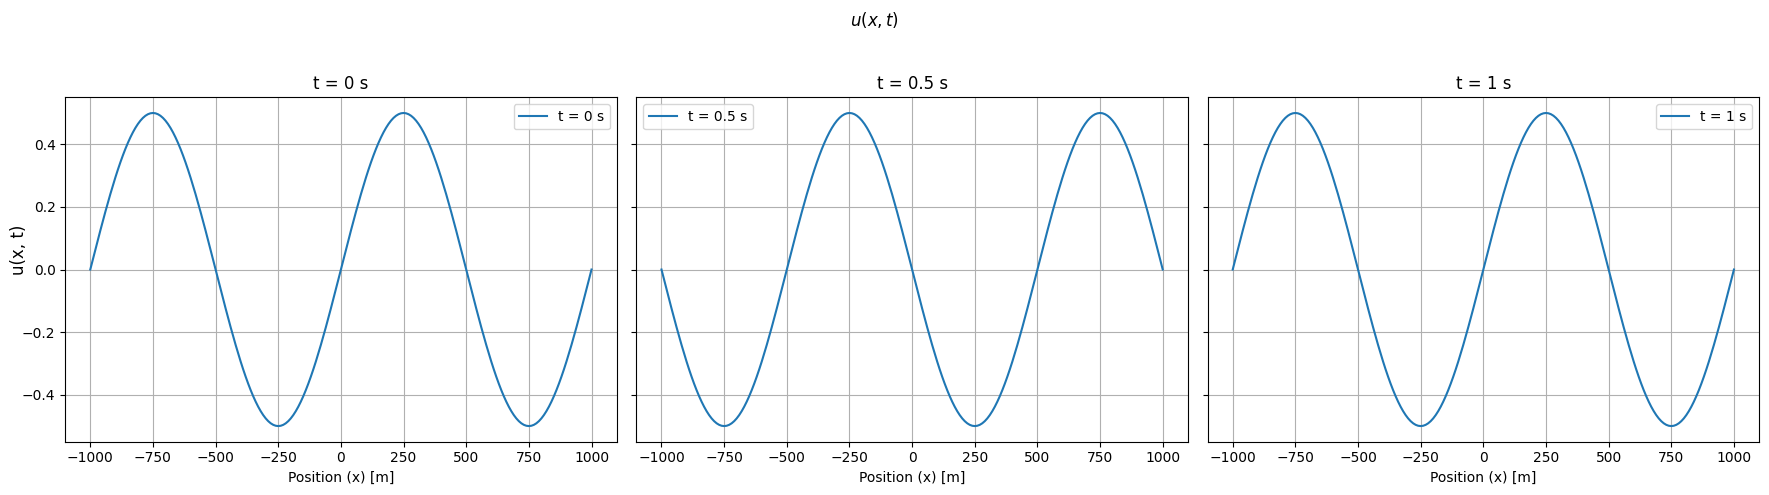

In [27]:
# define constants 
L = 1000
c = 1000
t_values = [0, 0.5, 1]
x = np.linspace(-L, L, 201)

# define analytical solution 
def u(x, t, c, L):
    return 0.5*np.cos(2*np.pi*c*t/L)*np.sin(2*np.pi*x/L)

# set up the figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# plot the wave solution at each specified time step in side-by-side subplots
for i, t in enumerate(t_values):
    axs[i].plot(x, u(x, t, c, L), label=f"t = {t} s")
    axs[i].set_xlabel("Position (x) [m]")
    axs[i].set_title(f"t = {t} s")
    axs[i].legend()
    axs[i].grid(True)

# set the y-axis label for the entire figure
fig.supylabel("u(x, t)")
fig.suptitle("$u(x, t)$")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [23]:
# code a numerical solver for the above system